In [2]:
from Bio import SeqIO
from Bio.Align import PairwiseAligner
import os

In [3]:
# Load ancient Dog fragments
dog_fragments_path = '../ancient_dna/ancient_dog_fragments.fasta'
ancient_dog_fragments = list(SeqIO.parse(dog_fragments_path, 'fasta'))
print(f"Loaded {len(ancient_dog_fragments)} ancient Dog fragments.")


Loaded 1000 ancient Dog fragments.


In [4]:
# Load full Dog genome
dog_genome_path = '../data/dog_genome.fna'
dog_reference = list(SeqIO.parse(dog_genome_path, 'fasta'))

print(f"Loaded {len(dog_reference)} sequences from Dog reference genome.")


Loaded 147 sequences from Dog reference genome.


In [ ]:
# Initialize the aligner
aligner = PairwiseAligner()

# Set scoring parameters
aligner.mode = 'local'  # Local alignment
aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = -0.5
aligner.extend_gap_score = -0.1

# Pick one fragment and one reference sequence
fragment = ancient_dog_fragments[0]
reference_seq = dog_reference[0].seq

# Perform alignment
alignments = aligner.align(reference_seq, fragment.seq)

# Show the best alignment
top_alignment = alignments[0]
print(top_alignment)
print(f"Alignment score: {top_alignment.score}")


target      1158925 GCTCCAGCTGTGGCCTGTTAGCTTCAGAAACATCTCACTGAAATGGAGCCCAACACCCGG
                  0 |||-||--|-|----||---||-||-----|--|-||||----|||-|---||-------
query             0 GCT-CA--T-T----TG---GC-TC-----C--C-CACT----TGG-G---AA-------

target      1158985 Tttccccagaaatacttaaggacaaggaattggagcccacaggacacgaaatgaaatgtg
                 60 |-----||-----||-------|-------|||------------|||---||----||-
query            25 T-----ca-----ac-------c-------tgg------------acg---tg----gt-

target      1159045 gac-cagacttttaCCACGTCCTGCAAAACTCACTCAATCCTCTTCCACTGTGGGCTGGA
                120 |||-----|||||-----------------||||-||---------||-----||--||-
query            41 gact----ctttt-----------------TCAC-CA---------CA-----GG--GG-

target      1159104 CTGCGGGCTAGTGCAGCCACCCTGG 1159129
                180 --||---||--|-----||||--||     205
query            62 --GC---CT--T-----CACC--GG      73

Alignment score: 117.50000000000017


In [15]:
# Use only the first 10,000 bases of the Dog genome for speed
dog_reference_short = dog_reference[0].seq[:10000]
print(f"Reference sequence length used: {len(dog_reference_short)} bases")


Reference sequence length used: 10000 bases


In [19]:
# Store alignment scores
dog_alignment_scores = []

# Align the first 10 fragments
for i, fragment in enumerate(ancient_dog_fragments[:10]):
    alignments = aligner.align(dog_reference_short, fragment.seq)
    
    if alignments:
        top_alignment = alignments[0]
        dog_alignment_scores.append(top_alignment.score)
        print(f"Dog Fragment {i+1}: Alignment Score = {top_alignment.score:.2f}")
    else:
        dog_alignment_scores.append(0)
        print(f"Dog Fragment  {i+1}: No alignment found.")


Dog Fragment 1: Alignment Score = 110.40
Dog Fragment 2: Alignment Score = 125.90
Dog Fragment 3: Alignment Score = 118.70
Dog Fragment 4: Alignment Score = 115.50
Dog Fragment 5: Alignment Score = 143.90
Dog Fragment 6: Alignment Score = 105.00
Dog Fragment 7: Alignment Score = 100.20
Dog Fragment 8: Alignment Score = 71.90
Dog Fragment 9: Alignment Score = 122.30
Dog Fragment 10: Alignment Score = 97.30


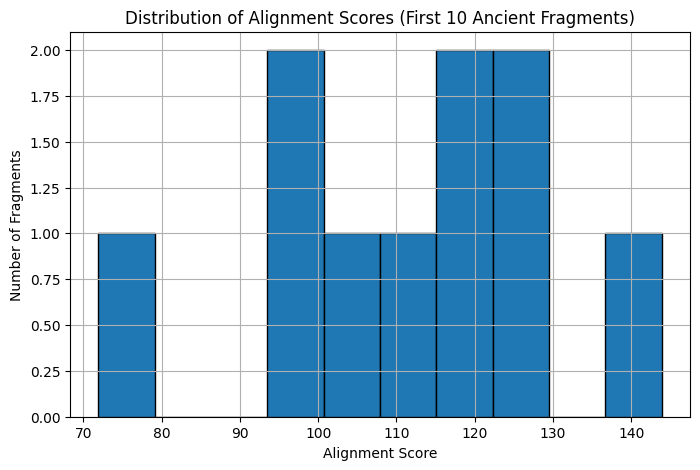

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of alignment scores
plt.figure(figsize=(8, 5))
plt.hist(dog_alignment_scores, bins=10, edgecolor='black')
plt.title('Distribution of Alignment Scores (First 10 Ancient Fragments)')
plt.xlabel('Alignment Score')
plt.ylabel('Number of Fragments')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Calculate basic statistics
mean_score = np.mean(dog_alignment_scores)
std_dev_score = np.std(dog_alignment_scores)

print(f"Average Alignment Score: {mean_score:.2f}")
print(f"Standard Deviation of Alignment Scores: {std_dev_score:.2f}")


Average Alignment Score: 111.11
Standard Deviation of Alignment Scores: 18.39


In [13]:
# Load ancient Wolf fragments
wolf_fragments_path = '../ancient_dna/ancient_wolf_fragments.fasta'
ancient_wolf_fragments = list(SeqIO.parse(wolf_fragments_path, 'fasta'))
print(f"Loaded {len(ancient_wolf_fragments)} ancient Wolf fragments.")


Loaded 1000 ancient Wolf fragments.


In [21]:
# Store alignment scores for Wolf fragments
wolf_dog_alignment_scores = []

# Align the first 10 Wolf fragments to the same Dog reference (shortened)
for i, wolf_fragment in enumerate(ancient_wolf_fragments[:10]):
    alignments = aligner.align(dog_reference_short, wolf_fragment.seq)
    
    if alignments:
        top_alignment = alignments[0]
        wolf_dog_alignment_scores.append(top_alignment.score)
        print(f"Wolf Fragment {i+1}: Alignment Score = {top_alignment.score:.2f}")
    else:
        wolf_dog_alignment_scores.append(0)
        print(f"Wolf Fragment {i+1}: No alignment found.")


Wolf Fragment 1: Alignment Score = 54.60
Wolf Fragment 2: Alignment Score = 53.30
Wolf Fragment 3: Alignment Score = 86.40
Wolf Fragment 4: Alignment Score = 126.10
Wolf Fragment 5: Alignment Score = 103.70
Wolf Fragment 6: Alignment Score = 50.50
Wolf Fragment 7: Alignment Score = 68.60
Wolf Fragment 8: Alignment Score = 56.30
Wolf Fragment 9: Alignment Score = 134.30
Wolf Fragment 10: Alignment Score = 108.80


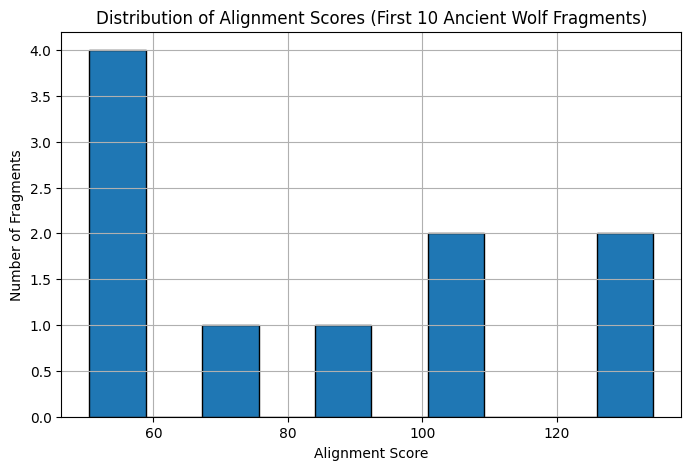

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(wolf_dog_alignment_scores, bins=10, edgecolor='black')
plt.title('Distribution of Alignment Scores (First 10 Ancient Wolf Fragments)')
plt.xlabel('Alignment Score')
plt.ylabel('Number of Fragments')
plt.grid(True)
plt.show()


In [ ]:
# Calculate basic statistics for Wolf alignment scores
wolf_mean_score = np.mean(wolf_dog_alignment_scores)
wolf_std_dev_score = np.std(wolf_dog_alignment_scores)

print(f"Average Alignment Score (Wolf): {wolf_mean_score:.2f}")
print(f"Standard Deviation (Wolf): {wolf_std_dev_score:.2f}")


Average Alignment Score (Wolf): 84.26
Standard Deviation (Wolf): 30.40


In [22]:
import pandas as pd

# Create a DataFrame to store scores
alignment_scores_df = pd.DataFrame({
    'Dog_Fragment_Score': dog_alignment_scores,
    'Wolf_Fragment_Score': wolf_dog_alignment_scores
})

# Save to a CSV file
alignment_scores_df.to_csv('../data/alignment_scores.csv', index=False)

print("Alignment scores saved to '../data/alignment_scores.csv'")


Alignment scores saved to '../data/alignment_scores.csv'


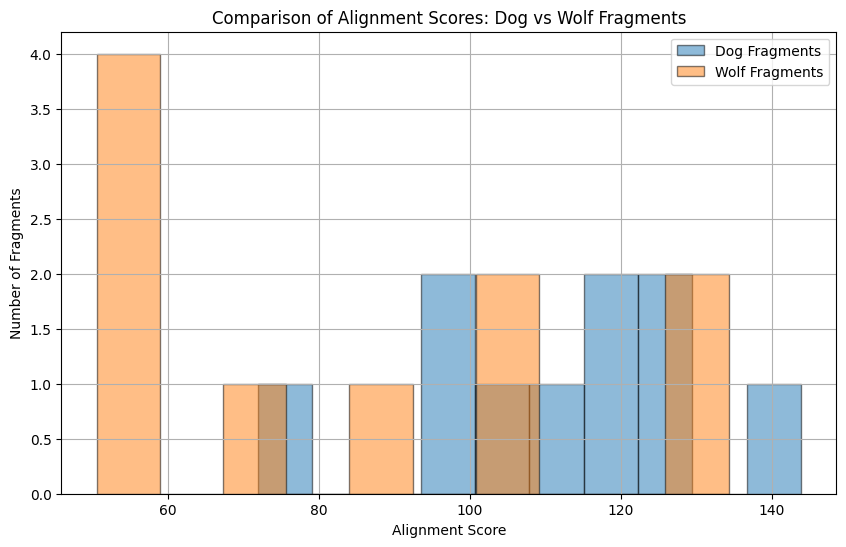

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(alignment_scores, bins=10, alpha=0.5, label='Dog Fragments', edgecolor='black')
plt.hist(wolf_dog_alignment_scores, bins=10, alpha=0.5, label='Wolf Fragments', edgecolor='black')
plt.title('Comparison of Alignment Scores: Dog vs Wolf Fragments')
plt.xlabel('Alignment Score')
plt.ylabel('Number of Fragments')
plt.legend()
plt.grid(True)
plt.show()
